In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path
import shutil
import random
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from skimage.io import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
path_dir_principal_train1 = "F:\\base\\asl_alphabet_train\\asl_alphabet_train" #path para o primeiro diretório pai com todas as imagens de treino
path_dir_principal_train2 = "F:\\base\\Train_Alphabet"  #path para o segundo diretório pai com todas as imagens de treino
path_dir_principal_test1 = "F:\\base\\asl_alphabet_test\\asl_alphabet_test" #path para o primeiro diretório pai com todas as imagens de teste
path_dir_principal_test2 = "F:\\base\\Test_Alphabet" #path para o segundo diretório pai com todas as imagens de teste
path_dir_final_train = "F:\\base\\ASL_total\\train" #path para o diretório final de treino
path_dir_final_test = "F:\\base\\ASL_total\\test" #path para o diretório final de teste
output_directory =  "F:\\base\\ASL_total" #path para o diretório final misturado

A gente escaneia os diretórios e transformamos eles em dataframes com as colunas ['dataset', 'letra', 'path', 'resolution'].
Como estamos com o objetivo de utilizar dois datasets diferentes, adicionamos a coluna 'dataset' para diferencia-los.
A coluna letra representa cada classe de cada dataset.
A coluna path representa o caminho para o diretório onde a imagem se localiza, é essencial para modificarmos os dados.
A coluna resolution mostra a resolução de cada imagem, com o objetivo de analisarmos a necessidade de um redimensionamento.

In [ ]:
def get_image_resolution(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size  # Retorna uma tupla (largura, altura)
    except Exception as e:
        print(f"Erro ao abrir imagem {image_path}: {e}")
        return None

def scan_directories(parent_dir):
    # Lista para armazenar os dados
    data = []

    # Percorre o diretório pai
    for root, dirs, files in os.walk(parent_dir):
        # Se estiver no subdiretório (ignora o diretório pai)
        for subdir in dirs:
            subdir_path = os.path.join(root, subdir)

            # Verifica todos os arquivos no subdiretório
            for file_name in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file_name)

                # Se for um arquivo de imagem, coleta os dados
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    resolution = get_image_resolution(file_path)
                    if resolution:
                        # Adiciona os dados ao Dataframe
                        data.append([os.path.basename(root), os.path.basename(subdir), file_path, resolution])

    # Cria o Dataframe
    df = pd.DataFrame(data, columns=['dataset', 'letra', 'path', 'resolution'])
    return df

In [5]:
parent_directory_train = path_dir_principal_train1
df_train = scan_directories(parent_directory_train)

parent_directory_test = path_dir_principal_test1
df_test = scan_directories(parent_directory_test)

In [6]:
parent_directory_train = path_dir_principal_train2
df2_train = scan_directories(parent_directory_train)

parent_directory_test = path_dir_principal_test2
df2_test = scan_directories(parent_directory_test)

path para o primeiro diretório pai com todas as imagens de teste 

In [8]:
display(df_train)
display(df_test)

,dataset,letra,path,resolution
0,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
1,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
2,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
3,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
4,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
...,...,...,...,...
86995,asl_alphabet_train,Z,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
86996,asl_alphabet_train,Z,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
86997,asl_alphabet_train,Z,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
86998,asl_alphabet_train,Z,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"


,dataset,letra,path,resolution


In [9]:
display(df2_train)
display(df2_test)

,dataset,letra,path,resolution
0,Train_Alphabet,A,F:\base\Train_Alphabet\A\0042513a-63c0-499f-a7...,"(513, 512)"
1,Train_Alphabet,A,F:\base\Train_Alphabet\A\00523102-a0df-4a94-b2...,"(513, 512)"
2,Train_Alphabet,A,F:\base\Train_Alphabet\A\006f6ffe-d6eb-4a0c-a4...,"(513, 512)"
3,Train_Alphabet,A,F:\base\Train_Alphabet\A\00849d5c-b13d-4fec-ad...,"(513, 512)"
4,Train_Alphabet,A,F:\base\Train_Alphabet\A\00961ff1-0a72-4af5-93...,"(513, 512)"
...,...,...,...,...
24295,Train_Alphabet,Z,F:\base\Train_Alphabet\Z\ff27d99e-e479-43a8-bd...,"(513, 512)"
24296,Train_Alphabet,Z,F:\base\Train_Alphabet\Z\ff29f829-0ab6-4c36-b0...,"(513, 512)"
24297,Train_Alphabet,Z,F:\base\Train_Alphabet\Z\ff3d1ce9-de5f-4a86-b3...,"(513, 512)"
24298,Train_Alphabet,Z,F:\base\Train_Alphabet\Z\ff4b5fe7-78d6-4b44-b1...,"(513, 512)"


,dataset,letra,path,resolution
0,Test_Alphabet,A,F:\base\Test_Alphabet\A\081a8b28-7394-4254-95a...,"(513, 512)"
1,Test_Alphabet,A,F:\base\Test_Alphabet\A\09a13b4f-b68f-43fd-86e...,"(513, 512)"
2,Test_Alphabet,A,F:\base\Test_Alphabet\A\09ea96a0-eb7b-4ce5-8a5...,"(513, 512)"
3,Test_Alphabet,A,F:\base\Test_Alphabet\A\0de66b7e-1449-4079-bf2...,"(513, 512)"
4,Test_Alphabet,A,F:\base\Test_Alphabet\A\103a0979-29c7-4519-b34...,"(513, 512)"
...,...,...,...,...
2695,Test_Alphabet,Z,F:\base\Test_Alphabet\Z\f60f518a-c8b0-4d38-838...,"(513, 512)"
2696,Test_Alphabet,Z,F:\base\Test_Alphabet\Z\fbdcddd1-f4f7-4110-8e3...,"(513, 512)"
2697,Test_Alphabet,Z,F:\base\Test_Alphabet\Z\fd007a3c-8690-4025-ad7...,"(513, 512)"
2698,Test_Alphabet,Z,F:\base\Test_Alphabet\Z\fe7beb8c-6ddd-44a4-973...,"(513, 512)"


A Seguir, vamos concatenar os dois dataframes para treinar o nosso modelo

In [10]:
df3_train = pd.concat([df_train, df2_train]).reset_index(drop=True)
df3_test = pd.concat([df_test, df2_test]).reset_index(drop=True)

In [11]:
display(df3_train)
display(df3_test)

,dataset,letra,path,resolution
0,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
1,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
2,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
3,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
4,asl_alphabet_train,A,F:\base\asl_alphabet_train\asl_alphabet_train\...,"(200, 200)"
...,...,...,...,...
111295,Train_Alphabet,Z,F:\base\Train_Alphabet\Z\ff27d99e-e479-43a8-bd...,"(513, 512)"
111296,Train_Alphabet,Z,F:\base\Train_Alphabet\Z\ff29f829-0ab6-4c36-b0...,"(513, 512)"
111297,Train_Alphabet,Z,F:\base\Train_Alphabet\Z\ff3d1ce9-de5f-4a86-b3...,"(513, 512)"
111298,Train_Alphabet,Z,F:\base\Train_Alphabet\Z\ff4b5fe7-78d6-4b44-b1...,"(513, 512)"


,dataset,letra,path,resolution
0,Test_Alphabet,A,F:\base\Test_Alphabet\A\081a8b28-7394-4254-95a...,"(513, 512)"
1,Test_Alphabet,A,F:\base\Test_Alphabet\A\09a13b4f-b68f-43fd-86e...,"(513, 512)"
2,Test_Alphabet,A,F:\base\Test_Alphabet\A\09ea96a0-eb7b-4ce5-8a5...,"(513, 512)"
3,Test_Alphabet,A,F:\base\Test_Alphabet\A\0de66b7e-1449-4079-bf2...,"(513, 512)"
4,Test_Alphabet,A,F:\base\Test_Alphabet\A\103a0979-29c7-4519-b34...,"(513, 512)"
...,...,...,...,...
2695,Test_Alphabet,Z,F:\base\Test_Alphabet\Z\f60f518a-c8b0-4d38-838...,"(513, 512)"
2696,Test_Alphabet,Z,F:\base\Test_Alphabet\Z\fbdcddd1-f4f7-4110-8e3...,"(513, 512)"
2697,Test_Alphabet,Z,F:\base\Test_Alphabet\Z\fd007a3c-8690-4025-ad7...,"(513, 512)"
2698,Test_Alphabet,Z,F:\base\Test_Alphabet\Z\fe7beb8c-6ddd-44a4-973...,"(513, 512)"


A seguir, vamos analisar o número de instâncias para cada classe, para ver se as instâncias estão balanceadas. Checaremos também a resolução.

In [12]:
display(df3_train.value_counts(subset='letra'))
display(df3_train.value_counts(subset='resolution'))

display(df3_test.value_counts(subset='letra'))
display(df3_test.value_counts(subset='resolution'))

letra
A        3900
B        3900
Blank    3900
C        3900
D        3900
E        3900
F        3900
G        3900
H        3900
I        3900
J        3900
K        3900
L        3900
M        3900
N        3900
O        3900
P        3900
Q        3900
R        3900
S        3900
T        3900
U        3900
V        3900
W        3900
X        3900
Y        3900
Z        3900
del      3000
space    3000
Name: count, dtype: int64

resolution
(200, 200)    87000
(513, 512)    24300
Name: count, dtype: int64

letra
A        100
B        100
Blank    100
C        100
D        100
E        100
F        100
G        100
H        100
I        100
J        100
K        100
L        100
M        100
N        100
O        100
P        100
Q        100
R        100
S        100
T        100
U        100
V        100
W        100
X        100
Y        100
Z        100
Name: count, dtype: int64

resolution
(513, 512)    2700
Name: count, dtype: int64

Funções para redimensionar as imagens para 200x200 e salvar as imagens redimensionadas em 200x200 pixels no banco de dados final, separando entre o banco de dados final de treino e o banco final de dados de treinamento. Vamos apenas escolher os dataframes com vogais para nosso modelo, devido ao tempo e poder computacional de nossos computadores.

In [ ]:
# Função para redimensionar uma imagem para 200x200 e salvar no novo diretório
def resize_image(image_path, output_path, resolution, size=(200, 200)):
    try:
        with Image.open(image_path) as img:
            # Redimensiona a imagem
            if(resolution != (200, 200)):
                final_img_original = img.resize(size)
            else:
                final_img_original = img
            
            # Cria o diretório de saída, se não existir
            os.makedirs(os.path.dirname(output_path), exist_ok=True)
            
            final_img_pb = final_img_original.convert('L')

            # Salva a imagem redimensionada no novo diretório
            final_img_pb.save(output_path)
    except Exception as e:
        print(f"Erro ao redimensionar imagem {image_path}: {e}")

# Função para processar o Dataframe e redimensionar as imagens
def resize_images_from_df(df, output_dir):
    for _, row in df.iterrows():
        image_path = row['path']  # Caminho da imagem original
        resolution = row['resolution']  # Resolução da imagem original
        subdir = row['letra']
        # Caminho no novo diretório de saída, mantendo a estrutura
        new_subdir = os.path.join(output_dir, subdir)
        output_path = os.path.join(new_subdir, os.path.basename(image_path))
 
        # Redimensiona e salva a imagem
        if subdir in ['A', 'E', 'I', 'O', 'U']:
            resize_image(image_path, output_path, resolution)

Criação dos diretórios contendo as imagens de treino e de teste no nosso computador

In [38]:
resize_images_from_df(df3_test, output_directory)
resize_images_from_df(df3_train, output_directory)

Renomeamos os arquivos para que fiquem na estrutura de letra e indice. e.g. A_100 (letra A com índice 100). Sendo assim ficaria melhor para manusear os dados e analisar.

In [5]:
def rename_files_in_subdirectories(parent_directory):
    """
    Renomeia os arquivos em subdiretórios do diretório principal.
    Os arquivos recebem nomes únicos baseados no nome do diretório pai.
    """
    for subdir in os.listdir(parent_directory):
        subdir_path = os.path.join(parent_directory, subdir)
        if not os.path.isdir(subdir_path):
            continue  # Ignorar arquivos na raiz do diretório principal

        count = 1  # Inicializa o contador para cada subdiretório
        for filename in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, filename)
            if not os.path.isfile(file_path):
                continue  # Ignorar subdiretórios dentro do subdiretório atual
            
            # Obtém a extensão do arquivo
            file_extension = os.path.splitext(filename)[1].lower()
            
            # Gera um novo nome único para o arquivo
            new_filename = f"{subdir}_{count}{file_extension}"
            new_file_path = os.path.join(subdir_path, new_filename)
            
            # Garante que o novo nome seja único
            while os.path.exists(new_file_path):
                count += 1
                new_filename = f"{subdir}_{count}{file_extension}"
                new_file_path = os.path.join(subdir_path, new_filename)

            # Renomeia o arquivo
            os.rename(file_path, new_file_path)
            print(f"{filename} renomeado para {new_filename}")
            count += 1

In [40]:
rename_files_in_subdirectories(output_directory)


0042513a-63c0-499f-a7f7-e6ee1266cb98.rgb_0000.png renomeado para A_1.png
00523102-a0df-4a94-b249-4f8c1c80f0b8.rgb_0000.png renomeado para A_2.png
006f6ffe-d6eb-4a0c-a48c-bba3a4abb12d.rgb_0000.png renomeado para A_3.png
00849d5c-b13d-4fec-ada9-0157c8e682d4.rgb_0000.png renomeado para A_4.png
00961ff1-0a72-4af5-931d-a3079e78c4a9.rgb_0000.png renomeado para A_5.png
00c14c44-e77c-43f7-a027-0c501395c00d.rgb_0000.png renomeado para A_6.png
00cfaeae-8bc3-4599-b5dd-8ad95069f3cc.rgb_0000.png renomeado para A_7.png
00ef5345-11f6-4781-bdce-51d094c97c62.rgb_0000.png renomeado para A_8.png
00fcc527-78bc-466c-9c7d-625238a2bdad.rgb_0000.png renomeado para A_9.png
00fdcd18-e94a-452e-bdca-582478d46c98.rgb_0000.png renomeado para A_10.png
012fb864-b9aa-48b8-bb85-85f6b6082fe2.rgb_0000.png renomeado para A_11.png
012fe6bc-30a5-476f-b9a0-9318d14a58bb.rgb_0000.png renomeado para A_12.png
01390270-5af9-4ab5-9a74-89c4a2e709b8.rgb_0000.png renomeado para A_13.png
0141bdf1-fe9d-4fa0-b5c1-21f638228ae8.rgb_0000.p

Apos tratamento, iremos criar o nosso dataframe final para treinar e avaliar o modelo

In [34]:
df_final_treino = scan_directories(output_directory)


Análise final após tratamento dos dados.

In [35]:
display(df_final_treino.value_counts(subset='letra'))

letra
A    4000
E    4000
I    4000
O    4000
U    4000
Name: count, dtype: int64

In [36]:
print(df_final_treino.head())

     dataset letra                           path  resolution
0  ASL_total     A    F:\base\ASL_total\A\A_1.png  (200, 200)
1  ASL_total     A   F:\base\ASL_total\A\A_10.png  (200, 200)
2  ASL_total     A  F:\base\ASL_total\A\A_100.png  (200, 200)
3  ASL_total     A  F:\base\ASL_total\A\A_101.png  (200, 200)
4  ASL_total     A  F:\base\ASL_total\A\A_102.png  (200, 200)


In [41]:
def split_dataset(base_dir, output_dir, train_ratio=0.8):
    # Define os nomes das subpastas para treinamento e teste
    train_dir = os.path.join(output_dir, "train")
    test_dir = os.path.join(output_dir, "test")
    
    # Cria os diretórios de saída se não existirem
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Lista todas as pastas/classes no diretório base
    classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    for class_name in classes:
        class_path = os.path.join(base_dir, class_name)

        # Lista todas as imagens da classe
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Embaralha aleatoriamente as imagens
        random.shuffle(images)

        # Calcula o ponto de divisão (80% para treinamento)
        split_index = int(len(images) * train_ratio)

        # Divide as imagens em treinamento e teste
        train_images = images[:split_index]
        test_images = images[split_index:]

        # Cria os diretórios específicos para a classe
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Move as imagens para os diretórios correspondentes
        for image in train_images:
            shutil.move(os.path.join(class_path, image), os.path.join(train_class_dir, image))
        for image in test_images:
            shutil.move(os.path.join(class_path, image), os.path.join(test_class_dir, image))

        print(f"Classe {class_name}: {len(train_images)} imagens para treinamento, {len(test_images)} imagens para teste.")

# Exemplo de uso
base_directory = output_directory
split_dataset(base_directory, base_directory)

Classe A: 3200 imagens para treinamento, 800 imagens para teste.
Classe E: 3200 imagens para treinamento, 800 imagens para teste.
Classe I: 3200 imagens para treinamento, 800 imagens para teste.
Classe O: 3200 imagens para treinamento, 800 imagens para teste.
Classe test: 0 imagens para treinamento, 0 imagens para teste.
Classe train: 0 imagens para treinamento, 0 imagens para teste.
Classe U: 3200 imagens para treinamento, 800 imagens para teste.


In [6]:
df_test = scan_directories(path_dir_final_test)
df_train = scan_directories(path_dir_final_train)

In [7]:
df_train.value_counts("letra")


letra
A    3200
E    3200
I    3200
O    3200
U    3200
Name: count, dtype: int64

In [8]:
df_test.value_counts("letra")

letra
A    800
E    800
I    800
O    800
U    800
Name: count, dtype: int64

In [ ]:
def load_images_from_folders(folder_path, target_size=(200, 200)):
    """
    Carrega imagens de subpastas 'A' e 'B' e realiza pré-processamento.
    Retorna os dados e rótulos.
    """
    data = []
    labels = []
    
    # Percorre o diretório que contém as subpastas "A", "E", "I", "O", "U"
    for label_folder in ['A', 'E', 'I', 'O', 'U']:
        folder = os.path.join(folder_path, label_folder)
        if not os.path.isdir(folder):
            continue
        
        # Carrega todas as imagens do diretório atual
        for file in os.listdir(folder):
            if file.endswith((".jpg", ".png", ".jpeg")):
                img_path = os.path.join(folder, file)
                img = imread(img_path, mode='L')  # Lê a imagem em tons de cinza
                data.append(img)
                labels.append(label_folder)
    
    return np.array(data), np.array(labels)

def create_model(input_shape, num_classes):
    """
    Cria um modelo CNN com 4 camadas convolucionais e regularização.
    """
    model = Sequential([
        # Primeira camada convolucional
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        # Segunda camada convolucional
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        # Terceira camada convolucional
        Conv2D(128, (3, 3), activation='relu'),  
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
        
        # Camada de achatamento
        Flatten(),
        
        # Camadas densas
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Saída ajustada para classificação
    ])
    
    # Compilação do modelo
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

parent_directory_train = path_dir_final_train 

parent_directory_test = path_dir_final_test

print("Carregando e pré-processando as imagens de treino...")
data_train, labels_train = load_images_from_folders(parent_directory_train)

print("Carregando e pré-processando as imagens de teste...")
data_test, labels_test = load_images_from_folders(parent_directory_test)

# Normalizando os dados
data_train = data_train / 255.0  # Escala para [0, 1]
data_test = data_test / 255.0    # Escala para [0, 1]

# Adicionando o canal para imagens em tons de cinza (1 canal)
data_train = data_train.reshape(-1, 200, 200, 1)
data_test = data_test.reshape(-1, 200, 200, 1)

# Codificando os rótulos (A -> 0, E -> 1, I -> 2, O -> 3, U -> 4)
label_encoder = LabelEncoder()
labels_train = label_encoder.fit_transform(labels_train)
labels_test = label_encoder.transform(labels_test)

# One-hot encoding
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

# Criando e treinando o modelo
print("Criando e treinando o modelo...")
model = create_model(input_shape=(200, 200, 1), num_classes=labels_train.shape[1])

history = model.fit(
    data_train,
    labels_train,
    validation_data=(data_test, labels_test),
    epochs= 20,
    batch_size=32
)

# Avaliando o modelo
print("Avaliando o modelo...")
loss, accuracy = model.evaluate(data_test, labels_test)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

predictions = model.predict(data_test)
predictions_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test, axis=1)

model.save('model.h5')

print("Relatório de Classificação:")
print(classification_report(true_labels, predictions_labels, target_names=label_encoder.classes_))
print("Matriz de Confusão:")
print(confusion_matrix(true_labels, predictions_labels))

Carregando e pré-processando as imagens de treino...
Carregando e pré-processando as imagens de teste...
Criando e treinando o modelo...


f:\Python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 727s 1s/step - accuracy: 0.1938 - loss: 1.7607 - val_accuracy: 0.1928 - val_loss: 2.1149
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 696s 1s/step - accuracy: 0.2013 - loss: 1.6095 - val_accuracy: 0.1898 - val_loss: 2.3464
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 697s 1s/step - accuracy: 0.1947 - loss: 1.6095 - val_accuracy: 0.1918 - val_loss: 2.3601
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 697s 1s/step - accuracy: 0.1952 - loss: 1.6096 - val_accuracy: 0.1992 - val_loss: 2.3482
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 698s 1s/step - accuracy: 0.1955 - loss: 1.6096 - val_accuracy: 0.2040 - val_loss: 2.3547
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 699s 1s/step - accuracy: 0.1991 - loss: 1.6095 - val_accuracy: 0.1905 - val_loss: 2.3646
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 701s 1s/step - accuracy: 0.1988 - loss: 1.6095 - val_accuracy: 0.1918 - val_loss: 2.3771
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 702s 1s/step - accuracy: 0.1955 - loss: 1.6096 - val_accu

Relatório de Classificação:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       800
           E       0.29      0.09      0.14       800
           I       0.03      0.01      0.01       800
           O       0.21      0.77      0.33       800
           U       0.21      0.16      0.18       800

    accuracy                           0.20      4000
   macro avg       0.15      0.21      0.13      4000
weighted avg       0.15      0.20      0.13      4000

Matriz de Confusão:
[[  0  63  44 593 100]
 [  2  73  17 557 151]
 [  4  46   5 613 132]
 [  4  30  66 616  84]
 [  1  38  27 608 126]]


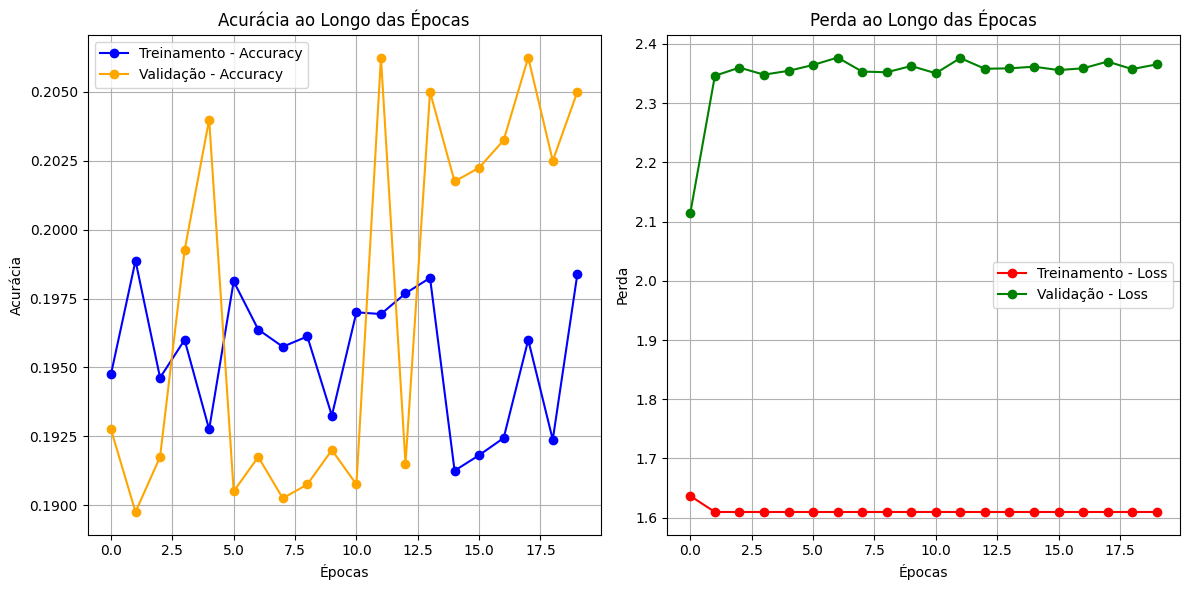

In [54]:
# Plotando o histórico do treinamento
plt.figure(figsize=(12, 6))

# Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento - Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validação - Accuracy', color='orange', marker='o')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento - Loss', color='red', marker='o')
plt.plot(history.history['val_loss'], label='Validação - Loss', color='green', marker='o')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

# Ajustando o layout e exibindo o gráfico
plt.tight_layout()
plt.show()

In [ ]:
def load_images_from_folders(folder_path, target_size=(200, 200)):
    """
    Carrega imagens de subpastas 'A' e 'B' e realiza pré-processamento.
    Retorna os dados e rótulos.
    """
    data = []
    labels = []
    
    # Percorre o diretório que contém as subpastas "A", "E", "I", "O", "U"
    for label_folder in ['A', 'E', 'I', 'O', 'U']:
        folder = os.path.join(folder_path, label_folder)
        if not os.path.isdir(folder):
            continue
        
        # Carrega todas as imagens do diretório atual
        for file in os.listdir(folder):
            if file.endswith((".jpg", ".png", ".jpeg")):
                img_path = os.path.join(folder, file)
                img = imread(img_path, mode='L')  # Lê a imagem em tons de cinza
                data.append(img)
                labels.append(label_folder)
    
    return np.array(data), np.array(labels)

def create_model(input_shape, num_classes):
    """
    Cria um modelo CNN com 4 camadas convolucionais e regularização.
    """
    model = Sequential([
        # Primeira camada convolucional
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        # Segunda camada convolucional
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Segunda camada convolucional
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Segunda camada convolucional
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Terceira camada convolucional
        Conv2D(4, (3, 3), activation='relu'),  
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Segunda camada convolucional
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        # Camada de achatamento
        Flatten(),
        
        # Camadas densas
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Saída ajustada para classificação
    ])
    
    # Compilação do modelo
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Caminhos para as pastas de imagens de treino e teste
# parent_directory_train = path_dir_final_train
parent_directory_train = path_dir_final_train
# parent_directory_test = path_dir_final_test
parent_directory_test = path_dir_final_test
print("Carregando e pré-processando as imagens de treino...")
data_train, labels_train = load_images_from_folders(parent_directory_train)

print("Carregando e pré-processando as imagens de teste...")
data_test, labels_test = load_images_from_folders(parent_directory_test)

# Normalizando os dados
data_train = data_train / 255.0  # Escala para [0, 1]
data_test = data_test / 255.0    # Escala para [0, 1]

# Adicionando o canal para imagens em tons de cinza (1 canal)
data_train = data_train.reshape(-1, 200, 200, 1)
data_test = data_test.reshape(-1, 200, 200, 1)


# Codificando os rótulos (A -> 0, E -> 1, I -> 2, O -> 3, U -> 4)

label_encoder = LabelEncoder()
labels_train = label_encoder.fit_transform(labels_train)
labels_test = label_encoder.transform(labels_test)

# One-hot encoding
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

# Criando e treinando o modelo
print("Criando e treinando o modelo...")
model = create_model(input_shape=(200, 200, 1), num_classes=labels_train.shape[1])

history = model.fit(
    data_train,
    labels_train,
    validation_data=(data_test, labels_test),
    epochs= 20,
    batch_size=32
)

# Avaliando o modelo
print("Avaliando o modelo...")
loss, accuracy = model.evaluate(data_test, labels_test)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

predictions = model.predict(data_test)
predictions_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test, axis=1)

model.save('model_2.h5')

print("Relatório de Classificação:")
print(classification_report(true_labels, predictions_labels, target_names=label_encoder.classes_))
print("Matriz de Confusão:")
print(confusion_matrix(true_labels, predictions_labels))

Carregando e pré-processando as imagens de treino...
Carregando e pré-processando as imagens de teste...
Criando e treinando o modelo...


f:\Python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 668s 1s/step - accuracy: 0.3252 - loss: 1.7510 - val_accuracy: 0.3708 - val_loss: 1.5198
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.5747 - loss: 1.0201 - val_accuracy: 0.4083 - val_loss: 1.9771
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 647s 1s/step - accuracy: 0.7556 - loss: 0.6323 - val_accuracy: 0.6837 - val_loss: 1.0469
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.8656 - loss: 0.3706 - val_accuracy: 0.7365 - val_loss: 0.8767
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 648s 1s/step - accuracy: 0.9165 - loss: 0.2357 - val_accuracy: 0.8845 - val_loss: 0.3193
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 647s 1s/step - accuracy: 0.9486 - loss: 0.1528 - val_accuracy: 0.8595 - val_loss: 0.4741
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.9605 - loss: 0.1241 - val_accuracy: 0.9610 - val_loss: 0.1266
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.9748 - loss: 0.0820 - val_accu

Relatório de Classificação:
              precision    recall  f1-score   support

           A       1.00      0.99      1.00       800
           E       0.97      0.99      0.98       800
           I       1.00      0.93      0.96       800
           O       1.00      0.99      0.99       800
           U       0.94      1.00      0.97       800

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

Matriz de Confusão:
[[795   3   0   0   2]
 [  2 793   0   0   5]
 [  0  18 743   1  38]
 [  0   1   0 794   5]
 [  0   0   0   1 799]]


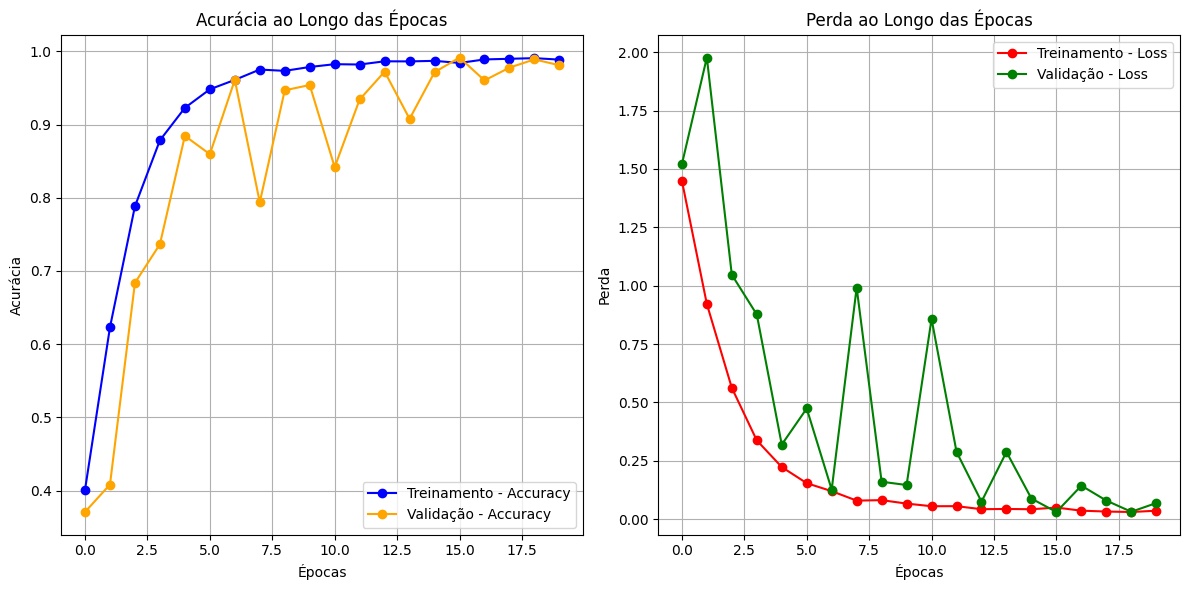

In [10]:
# Plotando o histórico do treinamento
plt.figure(figsize=(12, 6))

# Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento - Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validação - Accuracy', color='orange', marker='o')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento - Loss', color='red', marker='o')
plt.plot(history.history['val_loss'], label='Validação - Loss', color='green', marker='o')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

# Ajustando o layout e exibindo o gráfico
plt.tight_layout()
plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Plota a matriz de confusão com os valores reais e previstos.

    Args:
        y_true (array-like): Rótulos reais.
        y_pred (array-like): Rótulos previstos.
        class_names (list): Lista com os nomes das classes.
    """
    # Calcula a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    
    # Cria o gráfico da matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    
    # Configurações do gráfico
    plt.title("Matriz de Confusão")
    plt.xlabel("Classe Prevista")
    plt.ylabel("Classe Real")
    plt.tight_layout()
    plt.show()

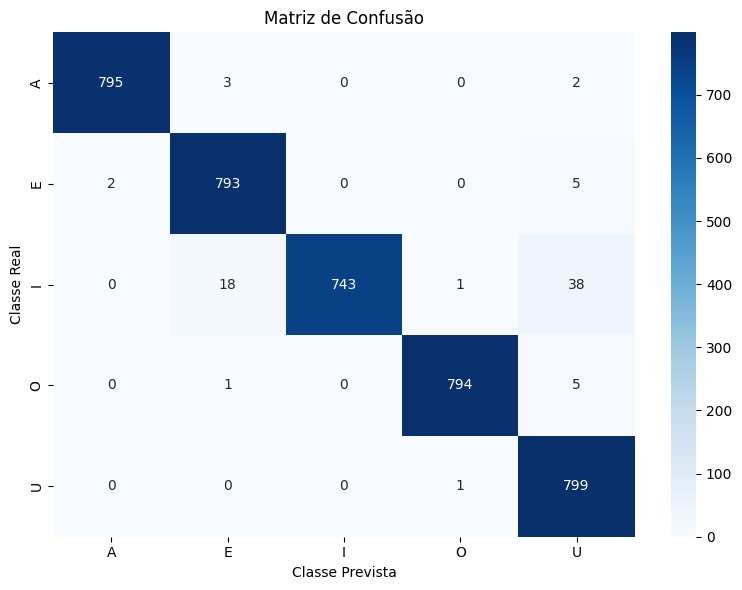

In [16]:

y_true = true_labels
y_pred = predictions_labels
class_names = label_encoder.classes_ 
plot_confusion_matrix(y_true, y_pred, class_names)